In [1]:
from __future__ import print_function

from IPython import display

import math
import matplotlib
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import radians, cos, sin, arcsin, arccos, sqrt, pi, arctan2, degrees, arctan
import itertools

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
tqdm.pandas(tqdm_notebook)

import osrm
from joblib import dump, load

from natsort import natsorted
pd.options.display.max_rows = 10

In [2]:
df = pd.read_csv('all.tsv', delim_whitespace=True, header =None, parse_dates=[1])
df.columns = ['trip id','iso timestamp','latitude','longitude']
grouper = df.groupby('trip id')

In [3]:

prod = []
for pair in itertools.combinations([1,2,3,4,5,6]
#     tracks_dict[1].iloc[:,1:].values
    ,3):
    prod.append(pair)
    print(pair)
    
# prod = []
# for index in list(itertools.combinations(tracks_dict[1].index,2)):
#     print(index)
# #     print(tracks_dict[1].loc[index,:])

(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 2, 6)
(1, 3, 4)
(1, 3, 5)
(1, 3, 6)
(1, 4, 5)
(1, 4, 6)
(1, 5, 6)
(2, 3, 4)
(2, 3, 5)
(2, 3, 6)
(2, 4, 5)
(2, 4, 6)
(2, 5, 6)
(3, 4, 5)
(3, 4, 6)
(3, 5, 6)
(4, 5, 6)


In [ ]:
foo = pd.DataFrame.from_records(prod)

In [ ]:
col_names = ['pickup_datetime','pickup_latitude', 'pickup_longitude'
             ,'dropoff_datetime','dropoff_latitude', 'dropoff_longitude']
foo = pd.concat([foo[0].apply(pd.Series), foo[1].apply(pd.Series)], axis = 1)
foo.columns = col_names

In [4]:
taxi2 = []
for name, val in tqdm(grouper):
    taxi2.append(compute_speed(val))

100%|██████████| 24999/24999 [05:42<00:00, 73.08it/s]


In [5]:
foo = pd.concat(taxi2)

In [6]:
foo

,trip id,iso timestamp,latitude,longitude,distance_travelled,time_elapsed_seconds,speed m/s,speed kmh
0,1,2007-01-07 10:54:50+00:00,37.782551,-122.445368,0.000000,0.0,0.000000,0.000000
1,1,2007-01-07 10:54:54+00:00,37.782745,-122.444586,0.072110,4.0,18.027600,64.899359
2,1,2007-01-07 10:54:58+00:00,37.782842,-122.443688,0.079741,4.0,19.935162,71.766582
3,1,2007-01-07 10:55:02+00:00,37.782919,-122.442815,0.077283,4.0,19.320846,69.555047
4,1,2007-01-07 10:55:06+00:00,37.782992,-122.442112,0.062381,4.0,15.595367,56.143321
...,...,...,...,...,...,...,...,...
1128658,25000,2007-01-06 02:37:56+00:00,37.766183,-122.429307,0.005378,4.0,1.344593,4.840535
1128659,25000,2007-01-06 02:38:28+00:00,37.766136,-122.429508,0.018446,32.0,0.576424,2.075126
1128660,25000,2007-01-06 02:38:32+00:00,37.766115,-122.429704,0.017406,4.0,4.351424,15.665126
1128661,25000,2007-01-06 02:38:36+00:00,37.766105,-122.429869,0.014563,4.0,3.640652,13.106348


In [7]:
grouper = foo.groupby('trip id')



  0%|          | 0/24999 [00:00<?, ?it/s]

  0%|          | 1/24999 [00:00<1:08:10,  6.11it/s]

  0%|          | 8/24999 [00:00<49:35,  8.40it/s]  

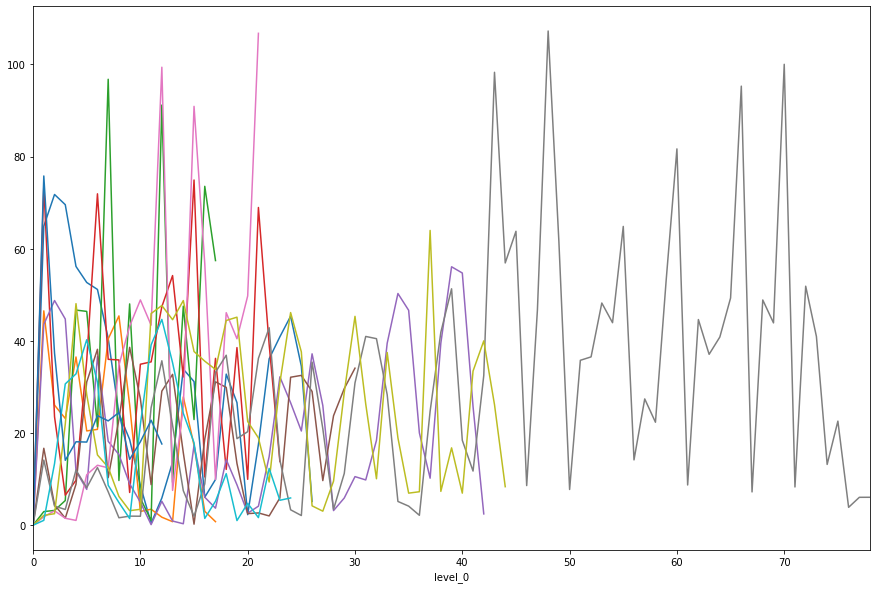

In [20]:
i = 0
fig, ax = plt.subplots()
for name, val in tqdm(grouper):
    val.reset_index().reset_index().plot('level_0','speed kmh', ax= ax, legend = False, figsize = (15,10))
    i+= 1
    if i >10:
        break

In [9]:
foo.to_csv('./all_withspeed.tsv')

In [2]:
df = pd.read_csv('all_withspeed.tsv',parse_dates=[2])
df.drop(df.columns[0], axis=1, inplace = True)

In [3]:
grouper = df.groupby('trip id')

In [4]:
taxi2 = []
for name, val in tqdm(grouper):
    prod = []
    for pair in itertools.combinations(val.iloc[:,1:].values,2):
        prod.append(pair)
    try:
        foo = pd.DataFrame.from_records(prod)
        foo = pd.concat([pd.DataFrame(foo[0].values.tolist()), pd.DataFrame(foo[1].values.tolist())], axis = 1)
        taxi2.append(foo)
    except KeyError:
        pass

100%|██████████| 24999/24999 [05:30<00:00, 75.53it/s] 


In [5]:
dump(taxi2, '/mnt/hgfs/FYP/allpairs_speed')

['/mnt/hgfs/FYP/allpairs_speed']

In [2]:
taxi2 = load('/mnt/hgfs/FYP/allpairs_speed')

In [3]:
taxi2[1]

,0,1,2,3,4,5,6,0,1,2,3,4,5,6
0,2007-01-06 06:22:35+00:00,37.800224,-122.433520,0.000000,0.0,0.000000,0.000000,2007-01-06 06:22:39+00:00,37.800155,-122.434101,0.051678,4.0,12.919610,46.510594
1,2007-01-06 06:22:35+00:00,37.800224,-122.433520,0.000000,0.0,0.000000,0.000000,2007-01-06 06:22:43+00:00,37.800160,-122.434430,0.028944,4.0,7.236004,26.049615
2,2007-01-06 06:22:35+00:00,37.800224,-122.433520,0.000000,0.0,0.000000,0.000000,2007-01-06 06:22:47+00:00,37.800378,-122.434527,0.025724,4.0,6.430954,23.151435
3,2007-01-06 06:22:35+00:00,37.800224,-122.433520,0.000000,0.0,0.000000,0.000000,2007-01-06 06:22:51+00:00,37.800738,-122.434598,0.040559,4.0,10.139675,36.502829
4,2007-01-06 06:22:35+00:00,37.800224,-122.433520,0.000000,0.0,0.000000,0.000000,2007-01-06 06:22:55+00:00,37.800938,-122.434650,0.022729,4.0,5.682216,20.455978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2007-01-06 06:23:55+00:00,37.800395,-122.436172,0.030915,4.0,7.728735,27.823444,2007-01-06 06:24:07+00:00,37.800169,-122.436130,0.006682,8.0,0.835287,3.007033
149,2007-01-06 06:23:55+00:00,37.800395,-122.436172,0.030915,4.0,7.728735,27.823444,2007-01-06 06:25:03+00:00,37.800066,-122.436167,0.011919,56.0,0.212836,0.766211
150,2007-01-06 06:23:59+00:00,37.800228,-122.436116,0.019232,4.0,4.807962,17.308664,2007-01-06 06:24:07+00:00,37.800169,-122.436130,0.006682,8.0,0.835287,3.007033
151,2007-01-06 06:23:59+00:00,37.800228,-122.436116,0.019232,4.0,4.807962,17.308664,2007-01-06 06:25:03+00:00,37.800066,-122.436167,0.011919,56.0,0.212836,0.766211


In [5]:
# fofoo = []
# for name, val in tqdm(grouper):
#     prod = []
#     for pair in itertools.combinations(val.iloc[:,1:].values,2):
#         prod.append(pair)
#     fofoo.append(prod)
# flat_list = [item for sublist in fofoo for item in sublist]
# foo = pd.DataFrame(flat_list)
# foo = pd.concat([pd.DataFrame(foo[0].values.tolist()), pd.DataFrame(foo[1].values.tolist())], axis = 1)    

100%|██████████| 24999/24999 [00:36<00:00, 687.10it/s]


In [ ]:
foo = pd.concat(taxi2)

In [ ]:
col_names = ['pickup_datetime','pickup_latitude', 'pickup_longitude'
         ,'dropoff_datetime','dropoff_latitude', 'dropoff_longitude']
# foo = pd.concat([foo[0].progress_apply(pd.Series), foo[1].apply(pd.Series)], axis = 1)
# foo = pd.concat([pd.DataFrame(foo[0].values.tolist()), pd.DataFrame(foo[1].values.tolist())], axis = 1)
foo.columns = col_names

In [ ]:
foo.to_csv('./allpairs.csv')

In [ ]:
foo.sample(10000).plot(x = 'pickup_latitude', y = 'pickup_longitude')

In [ ]:
chunk = 0
taxi = []
for df in pd.read_csv('allpairs.csv', chunksize = 1000000):
    taxi.append(df)
    chunk += 1
    if chunk == 5:
        break
    

In [ ]:
df = pd.read_csv('allpairs.csv')

In [ ]:
df2 = df.sample(frac = 1)

In [ ]:
df2.to_csv('/mnt/hgfs/FYP/allpairs_shuffled.csv')